# EDA Car Data Set

We will explore the Car Data set and perform the exploratory data analysis on the dataset. The major topics to be covered are below:

- Removing duplicates 
- Missing value treatment  
- Outlier Treatment
- Normalizing and Scaling( Numerical Variables)
- Encoding Categorical variables( Dummy Variables)
- Bivariate Analysis

As a first step, we will import all the necessary libraries that we think we will requiring to perform the EDA.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data set

We will  be loading the EDA cars excel file using pandas. For this we will be using read_excel file.

In [3]:
df=pd.read_excel('NBFC Loan Transaction Data.xlsx')

# Basic Data Exploration 

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

- head of the dataset
- shape of the dataset
- info of the dataset
- summary of the dataset

In [4]:
df.head()

AGREEMENTID AUTHORIZATIONDATE  BALANCE_EXCESS  BALANCE_TENURE    CITY  \
0     11220001        2010-08-29             0.0               0  MUMBAI   
1     11220002        2010-09-15             0.0              99  MUMBAI   
2     11220006        2010-11-02             0.0             231  MUMBAI   
3     11220008        2010-10-06             0.0               0   THANE   
4     11220010        2010-10-26             0.0             215  MUMBAI   

   COMPLETED_TENURE  CURRENT_INTEREST_RATE  CURRENT_INTEREST_RATE_MAX  \
0                45              13.421934                  13.734072   
1                38              13.734072                  13.734072   
2                81              15.606900                  16.231176   
3                91              11.236968                  13.734072   
4                89              14.982624                  15.606900   

   CURRENT_INTEREST_RATE_MIN  CURRENT_INTEREST_RATE_CHANGES  ...  \
0                  13.421934                              1  ...   
1                  13.734072                              0  ...   
2                  15.606900                              2  ...   
3                  11.236968                              4  ...   
4                  14.982624                              2  ...   

   PAID_PRINCIPAL  PRE_EMI_DUEAMT  PRE_EMI_OS_AMOUNT  PRE_EMI_RECEIVED_AMT  \
0    1.159366e+07     7994.273589                0.0           7994.273589   
1    6.942656e+06   100504.575864                0.0         100504.575864   
2    9.392115e+05     5947.630536                0.0           5947.630536   
3    9.979637e+06    60322.180776                0.0          60322.180776   
4    5.552847e+05    27732.787464                0.0          27732.787464   

   PRODUCT    SCHEMEID  NPA_IN_LAST_MONTH  NPA_IN_CURRENT_MONTH  MOB  \
0       HL  10901100.0                NaN                   NaN   45   
1       HL  10901100.0                NaN                   NaN   38   
2       HL  10901101.0                NaN                   NaN   81   
3       HL  10901100.0                NaN                   NaN   91   
4       HL  10901101.0                NaN                   NaN   90   

   FORECLOSURE  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 53 columns]

head  function will tell you the top records in the data set. By default python shows you only top 5 records.

In [5]:
df.shape

(20012, 53)

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The cars data set has 303 observations and 13 variables in the data set.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

info() is used to check the Information about the data and the datatypes of each respective attributes.

Looking at the data in the head function and in info, we know that the variable Income and travel time are of float data type instead of object. So we will convert it into float. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
INDEX             303 non-null int64
INCOME            260 non-null float64
MARITAL STATUS    275 non-null object
SEX               297 non-null object
EDUCATION         259 non-null object
JOB               267 non-null object
TRAVEL TIME       262 non-null float64
USE               250 non-null object
MILES CLOCKED     278 non-null float64
CAR TYPE          293 non-null object
CAR AGE           283 non-null float64
CITY              298 non-null object
POSTEL CODE       300 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


In [12]:
df.describe()

INDEX         INCOME  TRAVEL TIME  MILES CLOCKED     CAR AGE  \
count  303.000000     260.000000   262.000000     278.000000  283.000000   
mean   139.640264   50025.162170    34.282098   13591.978417    6.265018   
std     85.178422   41186.807914    14.910178    7167.328655    5.111218   
min      1.000000       0.000000     5.000000    1500.000000    1.000000   
25%     62.500000   20452.885022    24.449874    7900.000000    1.000000   
50%    138.000000   44571.590870    33.564757   12065.000000    6.000000   
75%    213.500000   66485.761387    43.907339   18240.000000   10.000000   
max    289.000000  204667.589700    83.617643   38000.000000   20.000000   

        POSTEL CODE  
count    300.000000  
mean   50712.196667  
std    24141.029290  
min    11435.000000  
25%    42420.000000  
50%    47150.000000  
75%    61701.000000  
max    90049.000000

The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

# Check for Duplicate records

In [7]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [AGREEMENTID, AUTHORIZATIONDATE, BALANCE_EXCESS, BALANCE_TENURE, CITY, COMPLETED_TENURE, CURRENT_INTEREST_RATE, CURRENT_INTEREST_RATE_MAX, CURRENT_INTEREST_RATE_MIN, CURRENT_INTEREST_RATE_CHANGES, CURRENT_TENOR, CUSTOMERID, DIFF_AUTH_INT_DATE, DIFF_CURRENT_INTEREST_RATE_MAX_MIN, DIFF_EMI_AMOUNT_MAX_MIN, DIFF_ORIGINAL_CURRENT_INTEREST_RATE, DIFF_ORIGINAL_CURRENT_TENOR, DPD, DUEDAY, EMI_AMOUNT, EMI_DUEAMT, EMI_OS_AMOUNT, EMI_RECEIVED_AMT, EXCESS_ADJUSTED_AMT, EXCESS_AVAILABLE, FOIR, INTEREST_START_DATE, LAST_RECEIPT_AMOUNT, LAST_RECEIPT_DATE, LATEST_TRANSACTION_MONTH, LOAN_AMT, MAX_EMI_AMOUNT, MIN_EMI_AMOUNT, MONTHOPENING, NET_DISBURSED_AMT, NET_LTV, NET_RECEIVABLE, NUM_EMI_CHANGES, NUM_LOW_FREQ_TRANSACTIONS, ORIGNAL_INTEREST_RATE, ORIGNAL_TENOR, OUTSTANDING_PRINCIPAL, PAID_INTEREST, PAID_PRINCIPAL, PRE_EMI_DUEAMT, PRE_EMI_OS_AMOUNT, PRE_EMI_RECEIVED_AMT, PRODUCT, SCHEMEID, NPA_IN_LAST_MONTH, NPA_IN_CURRENT_MONTH, MOB, FORECLOSURE]
Index: []

[0 rows x 53 columns]

Since we have 14 duplicate records in the data, we will remove this from the data set so that we get only distinct records.

In [14]:
df.drop_duplicates(inplace=True) 

Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.

In [15]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [INDEX, INCOME, MARITAL STATUS, SEX, EDUCATION, JOB, TRAVEL TIME, USE, MILES CLOCKED, CAR TYPE, CAR AGE, CITY, POSTEL CODE]
Index: []

Now, we can  clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute as those 14 records should be removed from the original data. Initially it had 303 records now it should have 289

In [16]:
df.shape

(289, 13)

# Check for missing value

In [8]:
# Check for missing value in any column
df.isnull().sum()

AGREEMENTID                                0
AUTHORIZATIONDATE                          0
BALANCE_EXCESS                             0
BALANCE_TENURE                             0
CITY                                       0
COMPLETED_TENURE                           0
CURRENT_INTEREST_RATE                      0
CURRENT_INTEREST_RATE_MAX                  0
CURRENT_INTEREST_RATE_MIN                  0
CURRENT_INTEREST_RATE_CHANGES              0
CURRENT_TENOR                              0
CUSTOMERID                               281
DIFF_AUTH_INT_DATE                         0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         0
DIFF_EMI_AMOUNT_MAX_MIN                   89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        0
DIFF_ORIGINAL_CURRENT_TENOR                0
DPD                                        0
DUEDAY                                     0
EMI_AMOUNT                                 0
EMI_DUEAMT                                 0
EMI_OS_AMOUNT                              0
EMI_RECEIV

We can see that we have various missing values in respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

- Drop the missing values : In this case we drop the missing values from those variables. In case there are very few missing values you can drop those values.

- Impute with mean value : For numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values .i.e. outliers.

- Impute with median value : For numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use median approach.

- Impute with mode value : For categorical column, you can replace the missing values with mode values i.e the frequent ones.

In this exercise, we will replace the numerical columns with meadian values and for categorical columns we will drop the missing values.

In [19]:
df.dropna(inplace=True)

As a cross check, post dropping the missing values we will see whether those has been removed from the actual data set.

In [9]:
# Check for missing value in any column
df.isnull().sum()

AGREEMENTID                                0
AUTHORIZATIONDATE                          0
BALANCE_EXCESS                             0
BALANCE_TENURE                             0
CITY                                       0
COMPLETED_TENURE                           0
CURRENT_INTEREST_RATE                      0
CURRENT_INTEREST_RATE_MAX                  0
CURRENT_INTEREST_RATE_MIN                  0
CURRENT_INTEREST_RATE_CHANGES              0
CURRENT_TENOR                              0
CUSTOMERID                               281
DIFF_AUTH_INT_DATE                         0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         0
DIFF_EMI_AMOUNT_MAX_MIN                   89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        0
DIFF_ORIGINAL_CURRENT_TENOR                0
DPD                                        0
DUEDAY                                     0
EMI_AMOUNT                                 0
EMI_DUEAMT                                 0
EMI_OS_AMOUNT                              0
EMI_RECEIV

In [10]:
df=df.drop(['DIFF_AUTH_INT_DATE', 'DIFF_CURRENT_INTEREST_RATE_MAX_MIN','DIFF_EMI_AMOUNT_MAX_MIN','DIFF_ORIGINAL_CURRENT_INTEREST_RATE','DIFF_ORIGINAL_CURRENT_TENOR'], axis=1)

In [11]:
df.shape

(20012, 48)

In [12]:
df= df.drop(['MOB', 'NPA_IN_LAST_MONTH'], axis=1)

In [13]:
df.shape

(20012, 46)

In [14]:
df= df.drop(['NPA_IN_CURRENT_MONTH'], axis=1)

In [16]:
df.shape

(20012, 45)

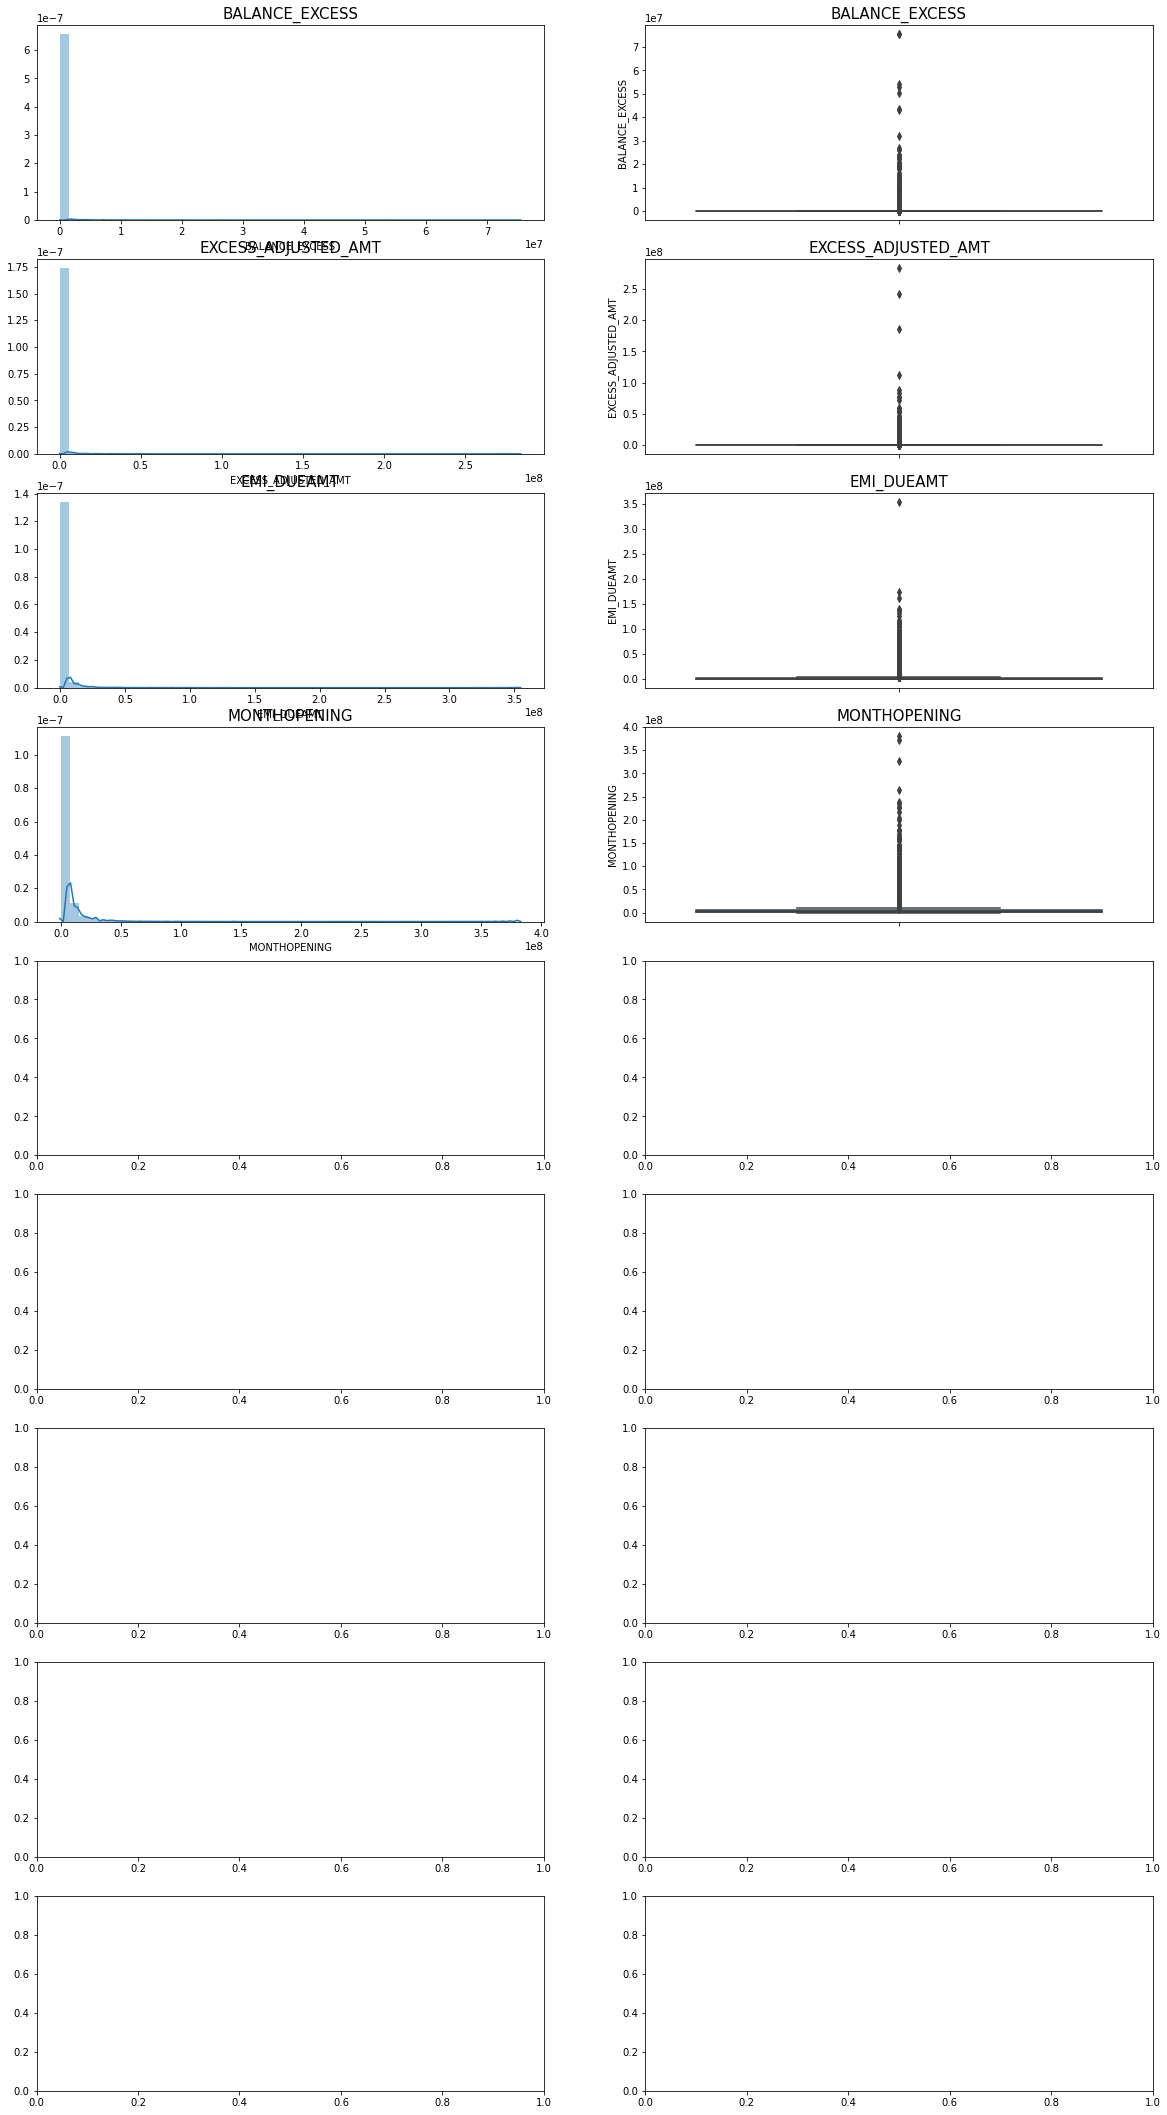

In [46]:

fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(20, 38)

a = sns.distplot(df['BALANCE_EXCESS'] , ax=axes[0][0])
a.set_title("BALANCE_EXCESS",fontsize=15)

a = sns.boxplot(df['BALANCE_EXCESS'] , orient = "v" , ax=axes[0][1])
a.set_title("BALANCE_EXCESS",fontsize=15)

a = sns.distplot(df['EXCESS_ADJUSTED_AMT'] , ax=axes[1][0])
a.set_title("EXCESS_ADJUSTED_AMT",fontsize=15)

a = sns.boxplot(df['EXCESS_ADJUSTED_AMT'] , orient = "v" , ax=axes[1][1])
a.set_title("EXCESS_ADJUSTED_AMT",fontsize=15)

a = sns.distplot(df['EMI_DUEAMT'] , ax=axes[2][0])
a.set_title("EMI_DUEAMT",fontsize=15)

a = sns.boxplot(df['EMI_DUEAMT'] , orient = "v" , ax=axes[2][1])
a.set_title("EMI_DUEAMT",fontsize=15)

a = sns.distplot(df['MONTHOPENING'] , ax=axes[3][0])
a.set_title("MONTHOPENING",fontsize=15)

a = sns.boxplot(df['MONTHOPENING'] , orient = "v" , ax=axes[3][1])
a.set_title("MONTHOPENING",fontsize=15)

                     
plt.show()

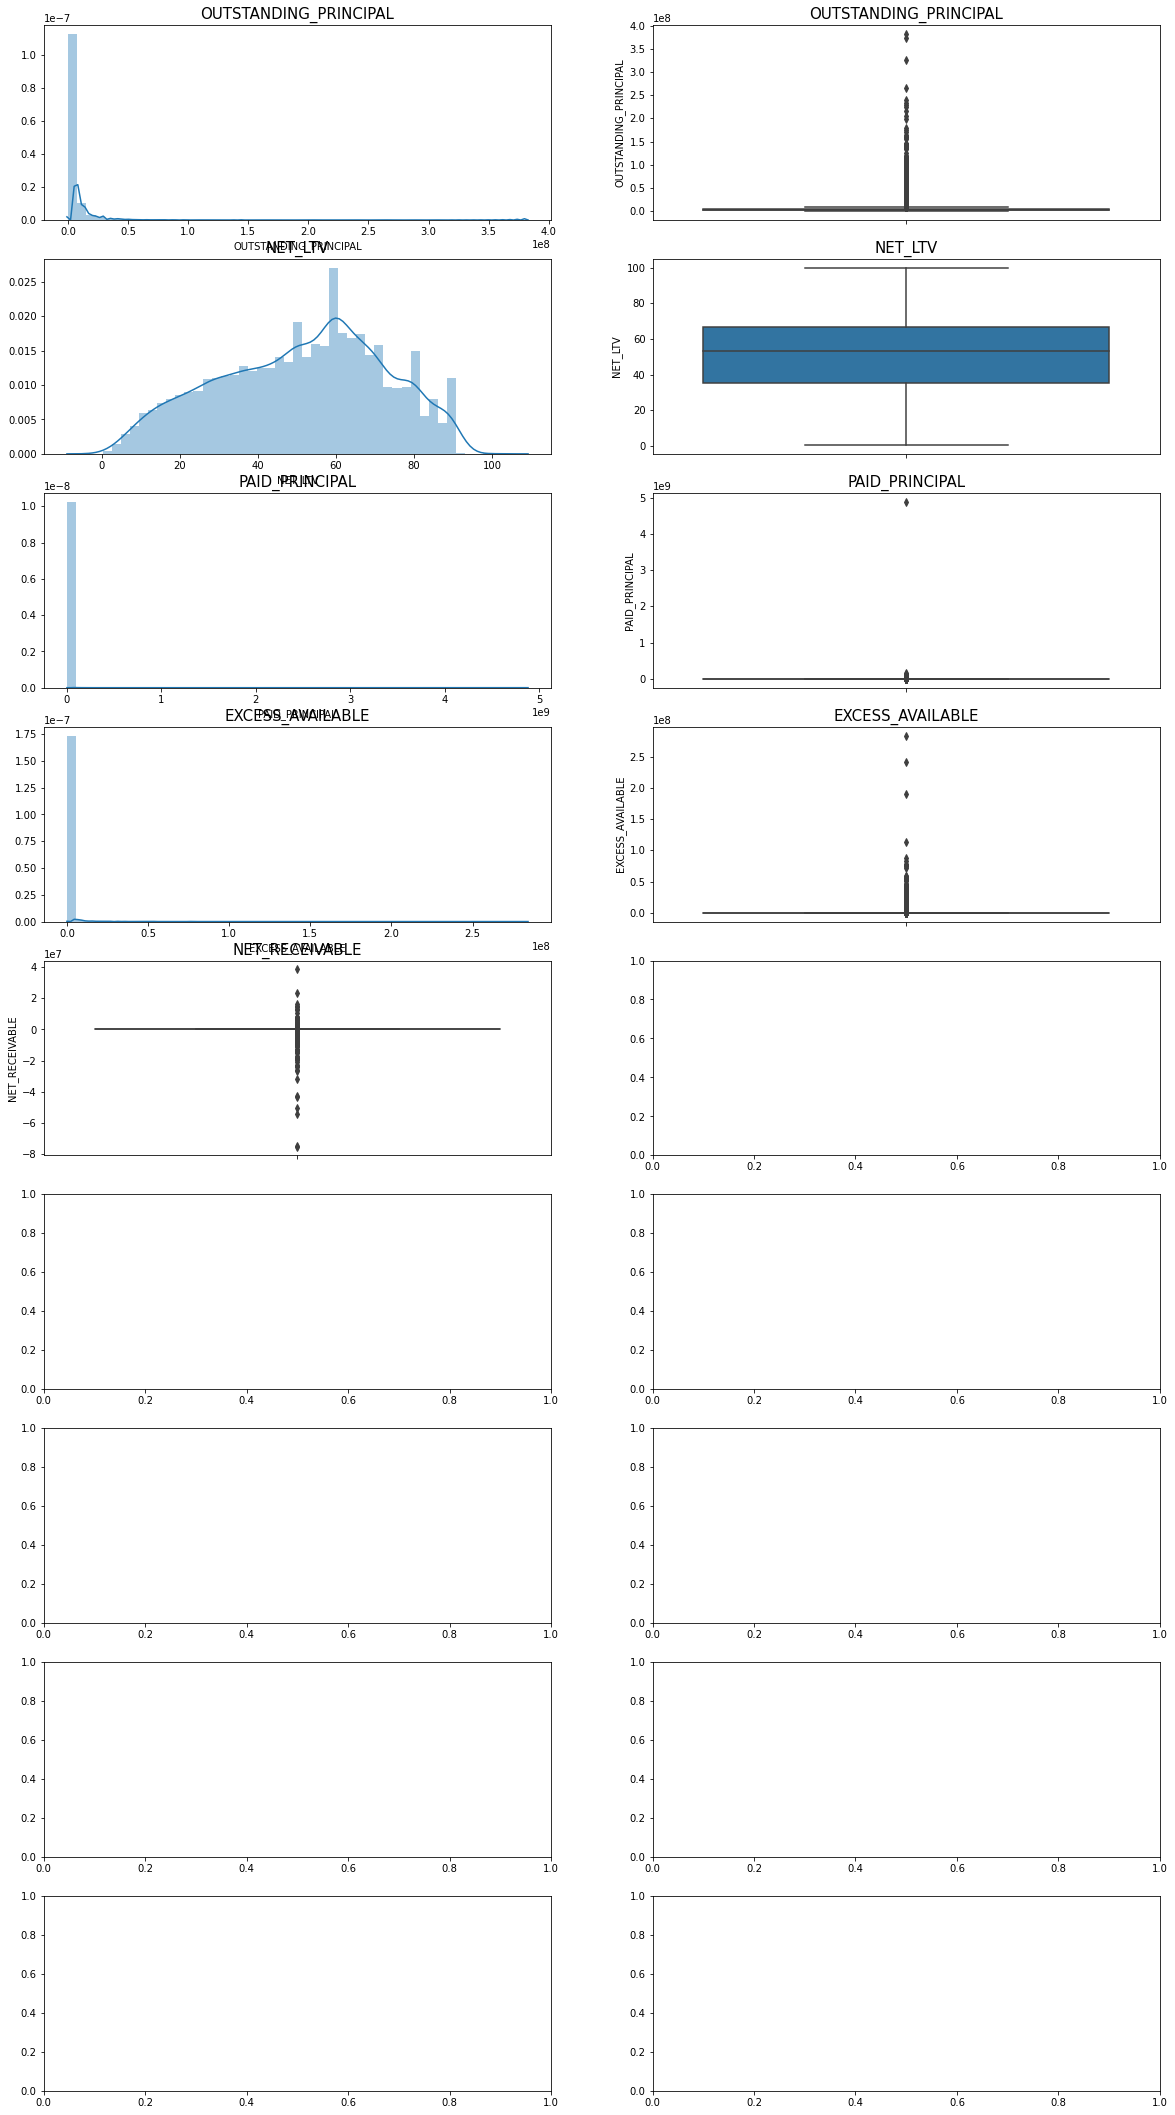

In [42]:
fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(20, 38)

a = sns.distplot(df['OUTSTANDING_PRINCIPAL'] , ax=axes[0][0])
a.set_title("OUTSTANDING_PRINCIPAL",fontsize=15)

a = sns.boxplot(df['OUTSTANDING_PRINCIPAL'] , orient = "v" , ax=axes[0][1])
a.set_title("OUTSTANDING_PRINCIPAL",fontsize=15)

a = sns.distplot(df['NET_LTV'] , ax=axes[1][0])
a.set_title("NET_LTV",fontsize=15)

a = sns.boxplot(df['NET_LTV'] , orient = "v" , ax=axes[1][1])
a.set_title("NET_LTV",fontsize=15)

a = sns.distplot(df['PAID_PRINCIPAL'] , ax=axes[2][0])
a.set_title("PAID_PRINCIPAL",fontsize=15)

a = sns.boxplot(df['PAID_PRINCIPAL'] , orient = "v" , ax=axes[2][1])
a.set_title("PAID_PRINCIPAL",fontsize=15)

a = sns.distplot(df['EXCESS_AVAILABLE'] , ax=axes[3][0])
a.set_title("EXCESS_AVAILABLE",fontsize=15)

a = sns.boxplot(df['EXCESS_AVAILABLE'] , orient = "v" , ax=axes[3][1])
a.set_title("EXCESS_AVAILABLE",fontsize=15)

a = sns.boxplot(df['NET_RECEIVABLE'] , orient = "v" , ax=axes[4][0])
a.set_title("NET_RECEIVABLE",fontsize=15)


plt.show()

In [49]:

a = sns.distplot(df['NET_RECEIVABLE'] , ax=axes[4][0])
a.set_title("NET_RECEIVABLE",fontsize=15)

a = sns.boxplot(df['NET_RECEIVABLE'] , orient = "v" , ax=axes[4][1])
a.set_title("NET_RECEIVABLE",fontsize=15)
                      
a = sns.distplot(df['PAID_INTEREST'] , ax=axes[5][0])
a.set_title("PAID_INTEREST",fontsize=15)

a = sns.boxplot(df['PAID_INTEREST'] , orient = "v" , ax=axes[5][1])
a.set_title("PAID_INTEREST",fontsize=15)
                      
a = sns.distplot(df['LOAN_AMT'] , ax=axes[6][0])
a.set_title("LOAN_AMT",fontsize=15)
                      
a = sns.boxplot(df['LOAN_AMT'] , orient = "v" , ax=axes[6][1])
a.set_title("LOAN_AMT",fontsize=15)
                    
a = sns.distplot(df['LAST_RECEIPT_AMOUNT'] ,  ax=axes[7][0])
a.set_title("LAST_RECEIPT_AMOUNT",fontsize=15)
                      
a = sns.boxplot(df['LAST_RECEIPT_AMOUNT'] , orient = "v" , ax=axes[7][1])
a.set_title("LAST_RECEIPT_AMOUNT",fontsize=15)
                      
a = sns.distplot(df['PAID_PRINCIPAL'] , ax=axes[8][0])
a.set_title("PAID_PRINCIPAL",fontsize=15)
                      
a = sns.boxplot(df['PAID_PRINCIPAL'] , orient = "v" , ax=axes[8][1])
a.set_title("PAID_PRINCIPAL",fontsize=15)
plt.show()


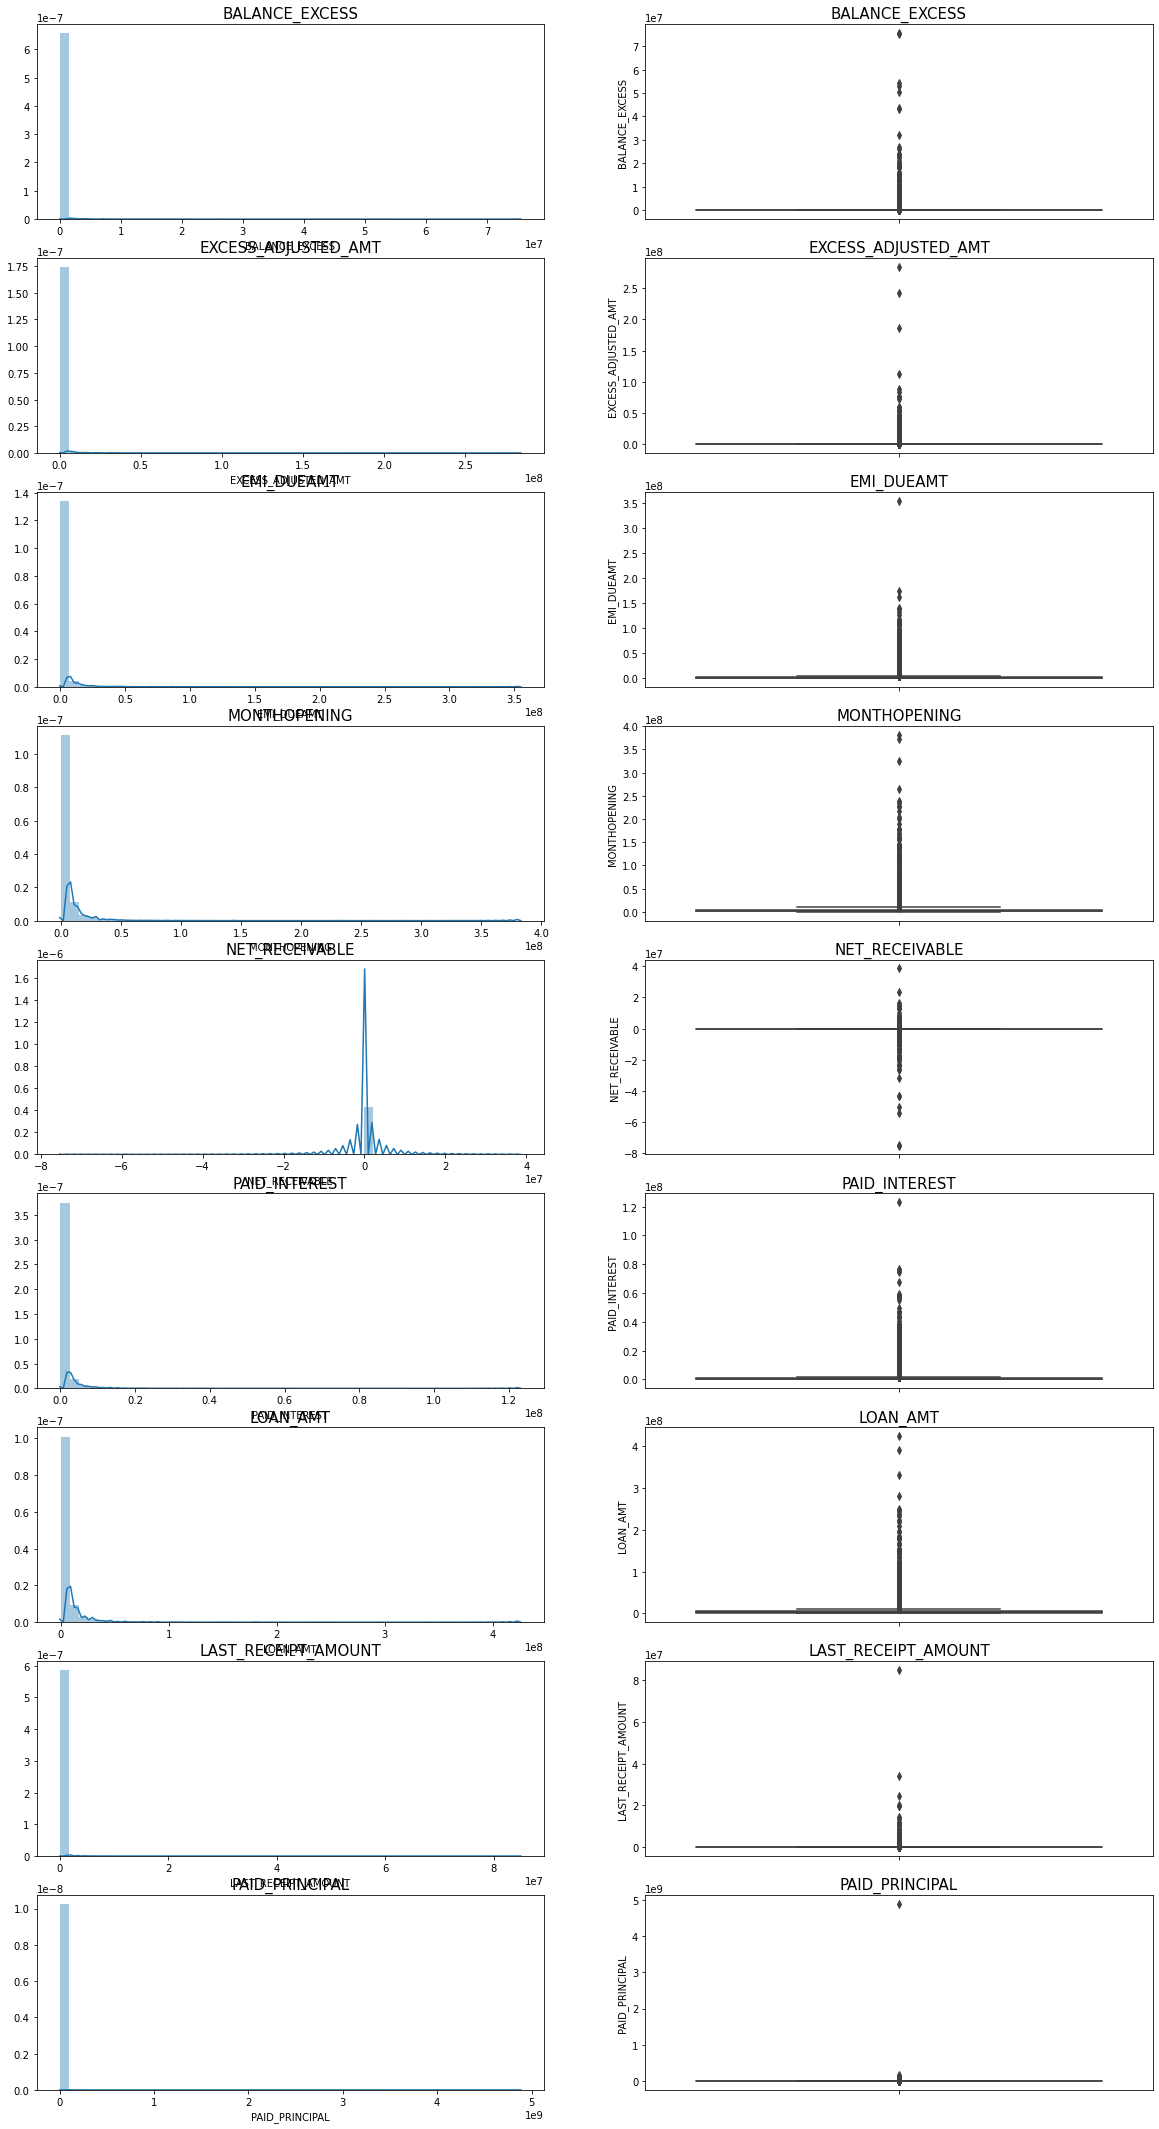

In [43]:
fig, axes = plt.subplots(nrows=9,ncols=2)
fig.set_size_inches(20, 38)

a = sns.distplot(df['BALANCE_EXCESS'] , ax=axes[0][0])
a.set_title("BALANCE_EXCESS",fontsize=15)

a = sns.boxplot(df['BALANCE_EXCESS'] , orient = "v" , ax=axes[0][1])
a.set_title("BALANCE_EXCESS",fontsize=15)

a = sns.distplot(df['EXCESS_ADJUSTED_AMT'] , ax=axes[1][0])
a.set_title("EXCESS_ADJUSTED_AMT",fontsize=15)

a = sns.boxplot(df['EXCESS_ADJUSTED_AMT'] , orient = "v" , ax=axes[1][1])
a.set_title("EXCESS_ADJUSTED_AMT",fontsize=15)

a = sns.distplot(df['EMI_DUEAMT'] , ax=axes[2][0])
a.set_title("EMI_DUEAMT",fontsize=15)

a = sns.boxplot(df['EMI_DUEAMT'] , orient = "v" , ax=axes[2][1])
a.set_title("EMI_DUEAMT",fontsize=15)

a = sns.distplot(df['MONTHOPENING'] , ax=axes[3][0])
a.set_title("MONTHOPENING",fontsize=15)

a = sns.boxplot(df['MONTHOPENING'] , orient = "v" , ax=axes[3][1])
a.set_title("MONTHOPENING",fontsize=15)

a = sns.distplot(df['NET_RECEIVABLE'] , ax=axes[4][0])
a.set_title("NET_RECEIVABLE",fontsize=15)

a = sns.boxplot(df['NET_RECEIVABLE'] , orient = "v" , ax=axes[4][1])
a.set_title("NET_RECEIVABLE",fontsize=15)
                      
a = sns.distplot(df['PAID_INTEREST'] , ax=axes[5][0])
a.set_title("PAID_INTEREST",fontsize=15)

a = sns.boxplot(df['PAID_INTEREST'] , orient = "v" , ax=axes[5][1])
a.set_title("PAID_INTEREST",fontsize=15)
                      
a = sns.distplot(df['LOAN_AMT'] , ax=axes[6][0])
a.set_title("LOAN_AMT",fontsize=15)
                      
a = sns.boxplot(df['LOAN_AMT'] , orient = "v" , ax=axes[6][1])
a.set_title("LOAN_AMT",fontsize=15)
                    
a = sns.distplot(df['LAST_RECEIPT_AMOUNT'] ,  ax=axes[7][0])
a.set_title("LAST_RECEIPT_AMOUNT",fontsize=15)
                      
a = sns.boxplot(df['LAST_RECEIPT_AMOUNT'] , orient = "v" , ax=axes[7][1])
a.set_title("LAST_RECEIPT_AMOUNT",fontsize=15)
                      
a = sns.distplot(df['PAID_PRINCIPAL'] , ax=axes[8][0])
a.set_title("PAID_PRINCIPAL",fontsize=15)
                      
a = sns.boxplot(df['PAID_PRINCIPAL'] , orient = "v" , ax=axes[8][1])
a.set_title("PAID_PRINCIPAL",fontsize=15)
                      
plt.show()

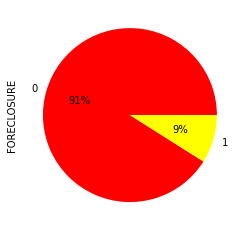

In [81]:
colors=['red','yellow','green','blue']
df.FORECLOSURE.value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', colors=colors)

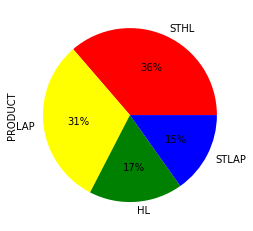

In [82]:
colors=['red','yellow','green','blue','cyan']
df.PRODUCT.value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', colors=colors)

In [ ]:
# Bivariate Analysis

In [20]:
ax = sns.pairplot(df,hue='FORECLOSURE',palette=['green','red'], diag_kind='kde')
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)


C:\Users\manuraj.ls\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\seaborn\distribut

In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

In [57]:
df.corr()

AGREEMENTID  BALANCE_EXCESS  BALANCE_TENURE  \
AGREEMENTID                       1.000000       -0.026376        0.439933   
BALANCE_EXCESS                   -0.026376        1.000000       -0.013110   
BALANCE_TENURE                    0.439933       -0.013110        1.000000   
COMPLETED_TENURE                 -0.787794        0.020138       -0.444990   
CURRENT_INTEREST_RATE            -0.273027       -0.008402       -0.385080   
CURRENT_INTEREST_RATE_MAX        -0.332096       -0.002579       -0.428379   
CURRENT_INTEREST_RATE_MIN        -0.267523       -0.006003       -0.393527   
CURRENT_INTEREST_RATE_CHANGES    -0.168180        0.005760        0.005468   
CURRENT_TENOR                     0.259049       -0.008660        0.967696   
CUSTOMERID                        0.999999       -0.025500        0.437314   
DPD                              -0.118109        0.103833       -0.059900   
DUEDAY                           -0.325471        0.021974       -0.202355   
EMI_AMOUNT                       -0.103817        0.098952       -0.131276   
EMI_DUEAMT                       -0.266375        0.073075       -0.214405   
EMI_OS_AMOUNT                    -0.060166        0.243628       -0.026566   
EMI_RECEIVED_AMT                 -0.263508        0.050254       -0.214218   
EXCESS_ADJUSTED_AMT              -0.090614        0.016578       -0.141427   
EXCESS_AVAILABLE                 -0.093790        0.339031       -0.137309   
FOIR                             -0.008633       -0.000412       -0.013235   
LAST_RECEIPT_AMOUNT              -0.044135        0.538515       -0.057304   
LATEST_TRANSACTION_MONTH          0.426432       -0.076133        0.175238   
LOAN_AMT                         -0.061460        0.108542       -0.064031   
MAX_EMI_AMOUNT                   -0.070092        0.549164       -0.080759   
MIN_EMI_AMOUNT                   -0.112149        0.074958       -0.056402   
MONTHOPENING                     -0.037983        0.113749       -0.028900   
NET_DISBURSED_AMT                -0.064082        0.109243       -0.064783   
NET_LTV                           0.186442        0.002590        0.277902   
NET_RECEIVABLE                   -0.002909       -0.881560        0.000255   
NUM_EMI_CHANGES                  -0.313269        0.036465       -0.205497   
NUM_LOW_FREQ_TRANSACTIONS        -0.421154        0.036553       -0.270128   
ORIGNAL_INTEREST_RATE            -0.308615       -0.001982       -0.445796   
ORIGNAL_TENOR                     0.181959       -0.010339        0.789760   
OUTSTANDING_PRINCIPAL            -0.018004        0.108213        0.002875   
PAID_INTEREST                    -0.288423        0.059088       -0.175462   
PAID_PRINCIPAL                   -0.025169        0.002514       -0.039391   
PRE_EMI_DUEAMT                   -0.077295        0.028982       -0.046128   
PRE_EMI_OS_AMOUNT                -0.001537       -0.000107        0.008543   
PRE_EMI_RECEIVED_AMT             -0.077392        0.029039       -0.046461   
SCHEMEID                          0.400887       -0.000516        0.063065   
FORECLOSURE                      -0.364058        0.016498       -0.053532   

                               COMPLETED_TENURE  CURRENT_INTEREST_RATE  \
AGREEMENTID                           -0.787794              -0.273027   
BALANCE_EXCESS                         0.020138              -0.008402   
BALANCE_TENURE                        -0.444990              -0.385080   
COMPLETED_TENURE                       1.000000               0.244766   
CURRENT_INTEREST_RATE                  0.244766               1.000000   
CURRENT_INTEREST_RATE_MAX              0.328593               0.975608   
CURRENT_INTEREST_RATE_MIN              0.200074               0.959207   
CURRENT_INTEREST_RATE_CHANGES          0.369826              -0.209865   
CURRENT_TENOR                         -0.204834              -0.351973   
CUSTOMERID                            -0.784839              -0.282846   
DPD               

(40.5, -0.5)

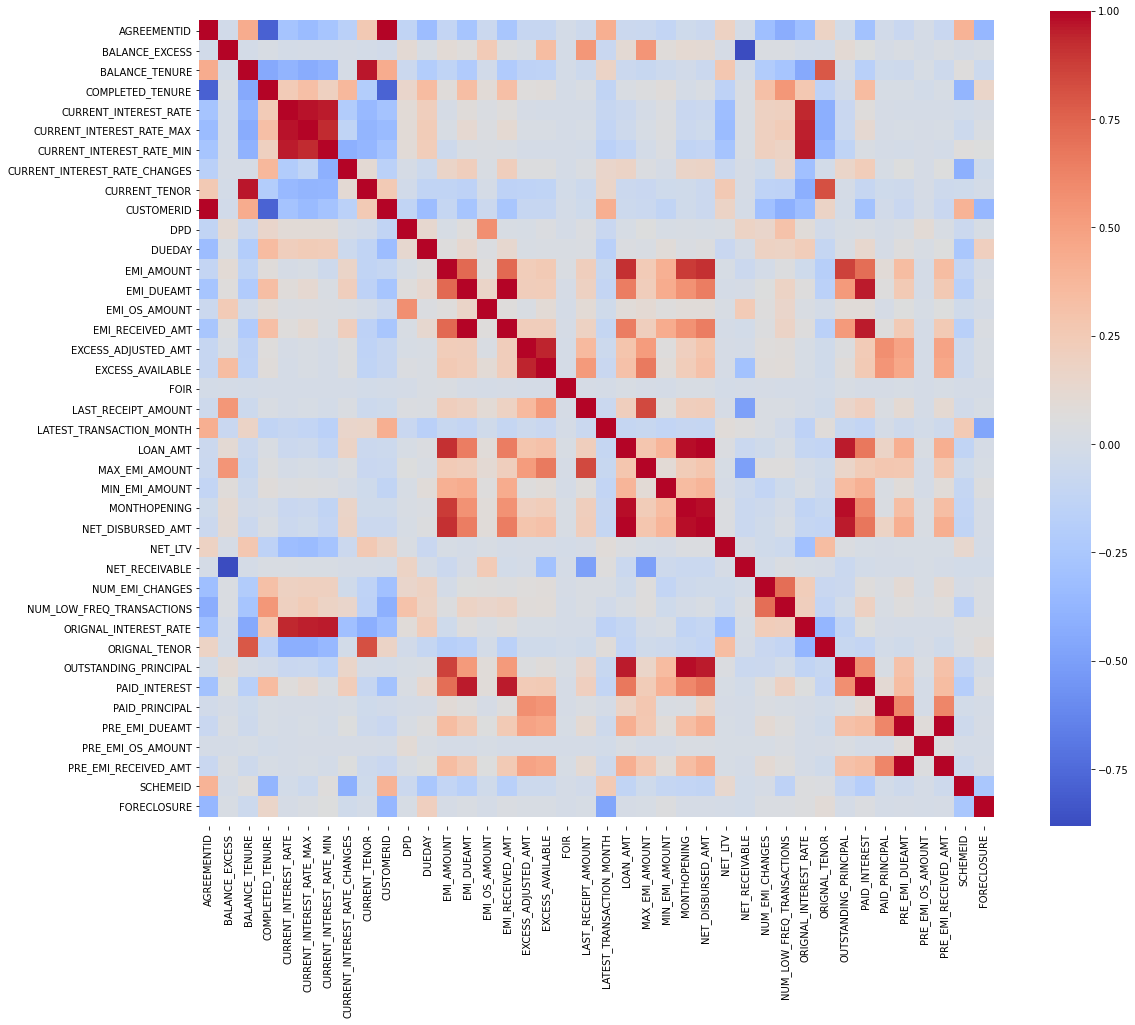

In [22]:
plt.figure(figsize=(20,15))
ax=sns.heatmap(df.corr(),cmap='coolwarm',square=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)  # plot the correlation coefficients as a heatmap

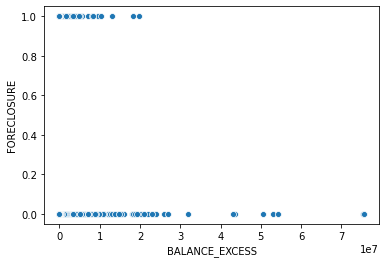

In [26]:
sns.scatterplot(df['BALANCE_EXCESS'], df['FORECLOSURE'])  # Plots the scatter plot using two variables

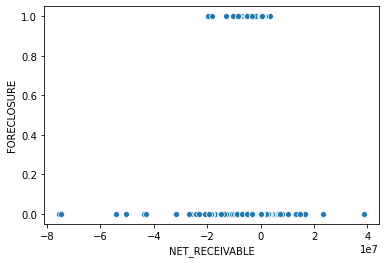

In [29]:
sns.scatterplot(df['NET_RECEIVABLE'], df['FORECLOSURE'])  # Plots the scatter plot using two variables

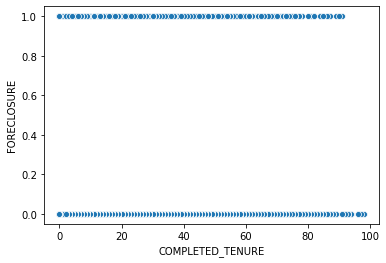

In [30]:
sns.scatterplot(df['COMPLETED_TENURE'], df['FORECLOSURE'])  # Plots the scatter plot using two variables

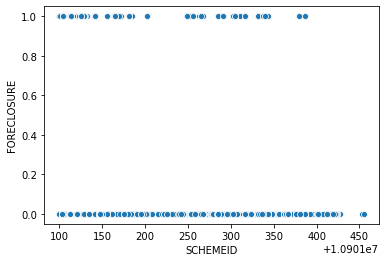

In [31]:
sns.scatterplot(df['SCHEMEID'], df['FORECLOSURE'])  # Plots the scatter plot using two variables

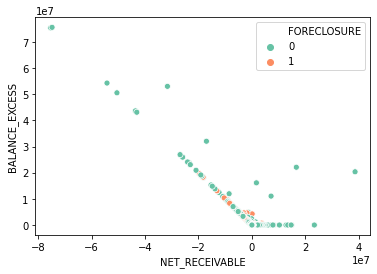

In [69]:
sns.scatterplot(df['NET_RECEIVABLE'], df['BALANCE_EXCESS'], hue=df['FORECLOSURE'], palette='Set2') 

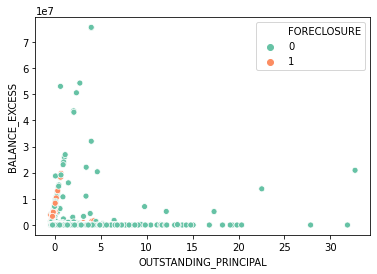

In [70]:
sns.scatterplot(df['OUTSTANDING_PRINCIPAL'], df['BALANCE_EXCESS'], hue=df['FORECLOSURE'], palette='Set2') 

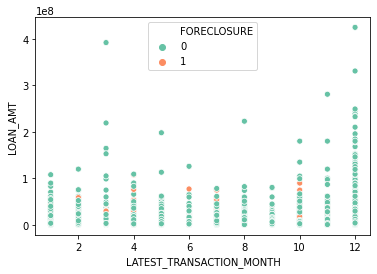

In [71]:
sns.scatterplot(df['LATEST_TRANSACTION_MONTH'], df['LOAN_AMT'], hue=df['FORECLOSURE'], palette='Set2') 

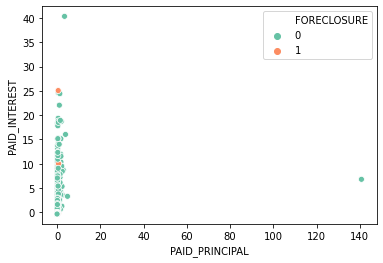

In [72]:
sns.scatterplot(df['PAID_PRINCIPAL'], df['PAID_INTEREST'], hue=df['FORECLOSURE'], palette='Set2') 

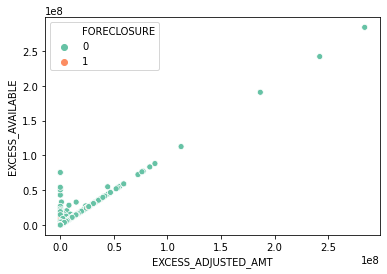

In [73]:
sns.scatterplot(df['EXCESS_ADJUSTED_AMT'], df['EXCESS_AVAILABLE'], hue=df['FORECLOSURE'], palette='Set2') 

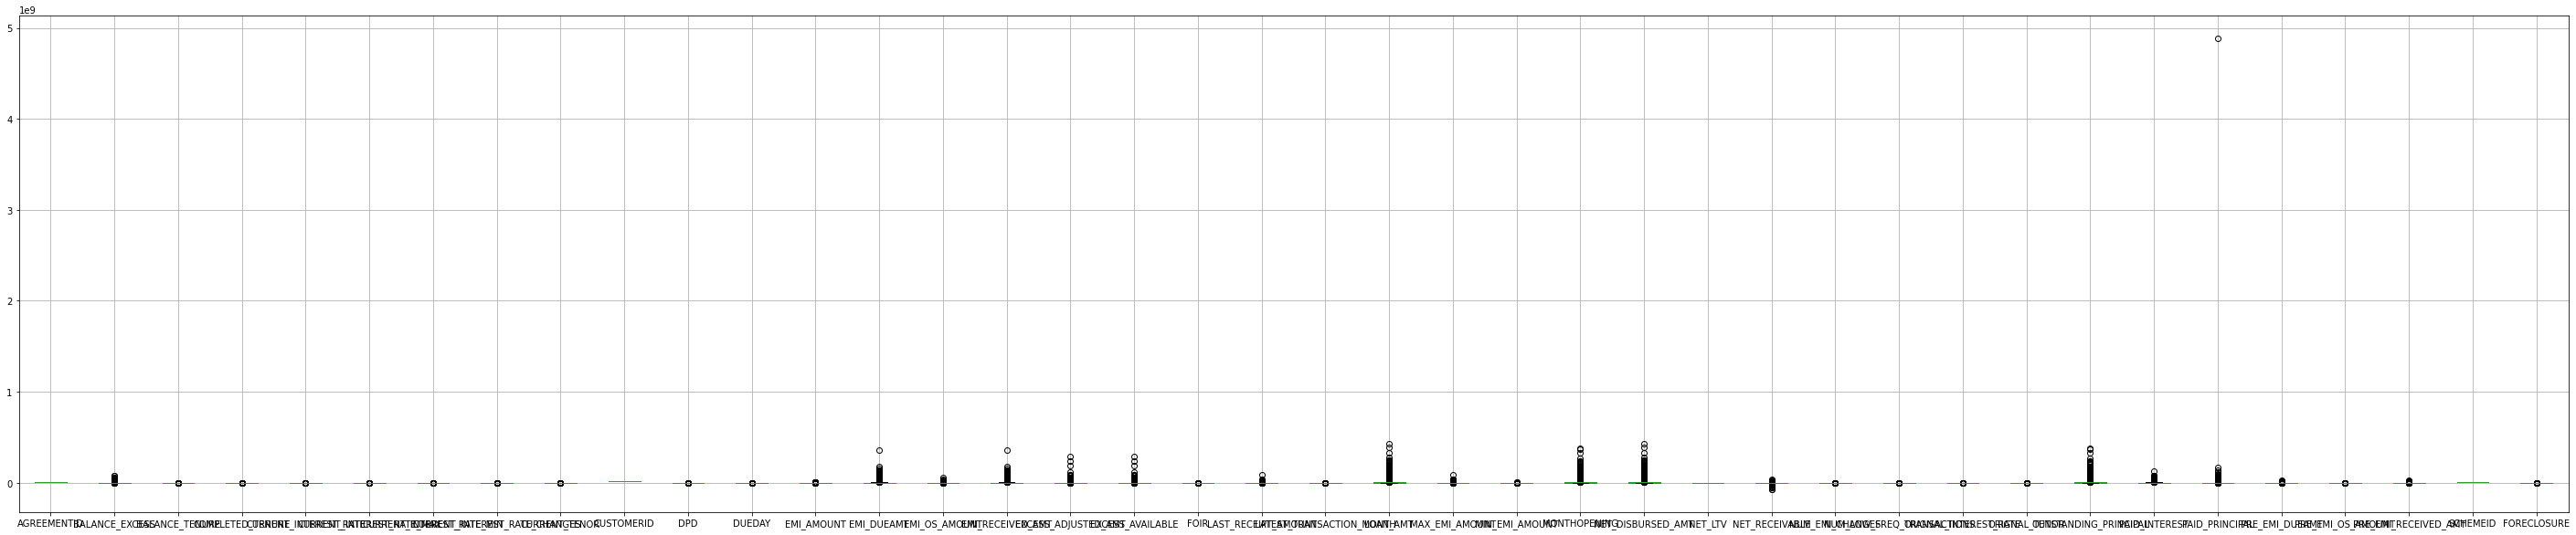

In [55]:
df.boxplot(figsize=(50,10))

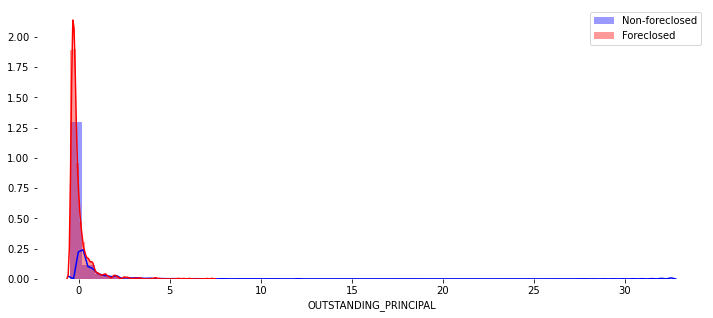

In [74]:
f, ax = plt.subplots(figsize = (12,5))
sns.distplot(df[df.FORECLOSURE==0].OUTSTANDING_PRINCIPAL, label = 'Non-foreclosed', color = 'blue')
sns.distplot(df[df.FORECLOSURE==1].OUTSTANDING_PRINCIPAL, label = 'Foreclosed', color = 'red')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

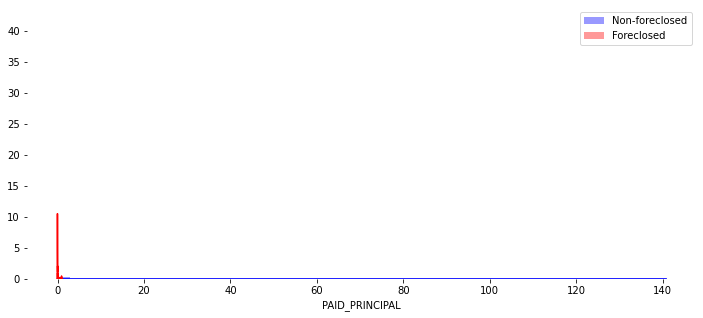

In [83]:
f, ax = plt.subplots(figsize = (12,5))
sns.distplot(df[df.FORECLOSURE==0].PAID_PRINCIPAL, label = 'Non-foreclosed', color = 'blue')
sns.distplot(df[df.FORECLOSURE==1].PAID_PRINCIPAL, label = 'Foreclosed', color = 'red')

ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

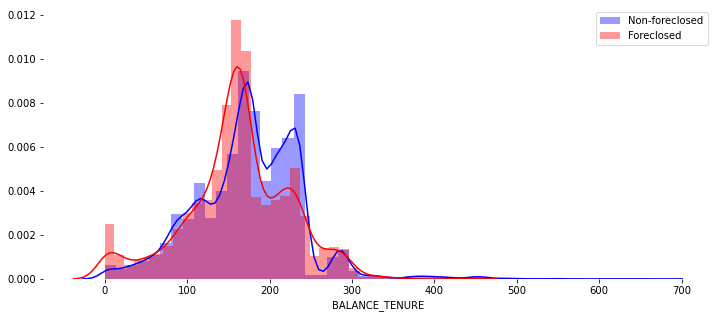

In [84]:
f, ax = plt.subplots(figsize = (12,5))
sns.distplot(df[df.FORECLOSURE==0].BALANCE_TENURE, label = 'Non-foreclosed', color = 'blue')
sns.distplot(df[df.FORECLOSURE==1].BALANCE_TENURE, label = 'Foreclosed', color = 'red')

ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

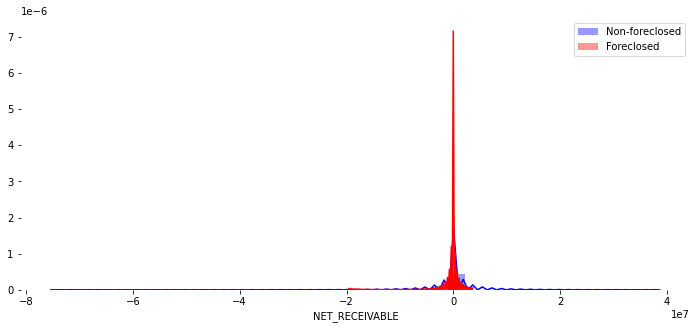

In [85]:
f, ax = plt.subplots(figsize = (12,5))
sns.distplot(df[df.FORECLOSURE==0].NET_RECEIVABLE , label = 'Non-foreclosed', color = 'blue')
sns.distplot(df[df.FORECLOSURE==1].NET_RECEIVABLE , label = 'Foreclosed', color = 'red')

ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   AGREEMENTID                    20012 non-null  int64         
 1   AUTHORIZATIONDATE              20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                 20012 non-null  float64       
 3   BALANCE_TENURE                 20012 non-null  int64         
 4   CITY                           20012 non-null  object        
 5   COMPLETED_TENURE               20012 non-null  int64         
 6   CURRENT_INTEREST_RATE          20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX      20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN      20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES  20012 non-null  int64         
 10  CURRENT_TENOR                  20012 non-null  int64         
 11  CUSTOMERID     

In [56]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
l1,u1=remove_outlier(data['Apps'])
data['Apps']=np.where(data['Apps']>u1,u1,data['Apps'])
data['Apps']=np.where(data['Apps']<l1,l1,data['Apps'])

l2,u2=remove_outlier(data['Accept'])
data['Accept']=np.where(data['Accept']>u2,u2,data['Accept'])
data['Accept']=np.where(data['Accept']<l2,l2,data['Accept'])

l3,u3=remove_outlier(data['Enroll'])
data['Enroll']=np.where(data['Enroll']>u3,u3,data['Enroll'])
data['Enroll']=np.where(data['Enroll']<l3,l3,data['Enroll'])

l4,u4=remove_outlier(data['F.Undergrad'])
data['F.Undergrad']=np.where(data['F.Undergrad']>u4,u4,data['F.Undergrad'])
data['F.Undergrad']=np.where(data['F.Undergrad']<l4,l4,data['F.Undergrad'])

l5,u5=remove_outlier(data['P.Undergrad'])
data['P.Undergrad']=np.where(data['P.Undergrad']>u5,u5,data['P.Undergrad'])
data['P.Undergrad']=np.where(data['P.Undergrad']<l5,l5,data['P.Undergrad'])

l6,u6=remove_outlier(data['Room.Board'])
data['Room.Board']=np.where(data['Room.Board']>u6,u6,data['Room.Board'])
data['Room.Board']=np.where(data['Room.Board']<l6,l6,data['Room.Board'])

l7,u7=remove_outlier(data['Books'])
data['Books']=np.where(data['Books']>u7,u7,data['Books'])
data['Books']=np.where(data['Books']<l7,l7,data['Books'])

l8,u8=remove_outlier(data['Personal'])
data['Personal']=np.where(data['Personal']>u8,u8,data['Personal'])
data['Personal']=np.where(data['Personal']<l8,l8,data['Personal'])

l9,u9=remove_outlier(data['PhD'])
data['PhD']=np.where(data['PhD']>u9,u9,data['PhD'])
data['PhD']=np.where(data['PhD']<l9,l9,data['PhD'])

l10,u10=remove_outlier(data['Terminal'])
data['Terminal']=np.where(data['Terminal']>u10,u10,data['Terminal'])
data['Terminal']=np.where(data['Terminal']<l10,l10,data['Terminal'])

l11,u11=remove_outlier(data['S.F.Ratio'])
data['S.F.Ratio']=np.where(data['S.F.Ratio']>u11,u11,data['S.F.Ratio'])
data['S.F.Ratio']=np.where(data['S.F.Ratio']<l11,l11,data['S.F.Ratio'])

l12,u12=remove_outlier(data['perc.alumni'])
data['perc.alumni']=np.where(data['perc.alumni']>u12,u12,data['perc.alumni'])
data['perc.alumni']=np.where(data['perc.alumni']<l12,l12,data['perc.alumni'])

l13,u13=remove_outlier(data['Expend'])
data['Expend']=np.where(data['Expend']>u13,u13,data['Expend'])
data['Expend']=np.where(data['Expend']<l13,l13,data['Expend'])

l14,u14=remove_outlier(data['Grad.Rate'])
data['Grad.Rate']=np.where(data['Grad.Rate']>u14,u14,data['Grad.Rate'])
data['Grad.Rate']=np.where(data['Grad.Rate']<l14,l14,data['Grad.Rate'])

l15,u15=remove_outlier(data['Top10perc'])
data['Top10perc']=np.where(data['Top10perc']>u15,u15,data['Top10perc'])
data['Top10perc']=np.where(data['Top10perc']<l15,l15,data['Top10perc'])

l16,u16=remove_outlier(data['Top25perc'])
data['Top25perc']=np.where(data['Top25perc']>u16,u16,data['Top25perc'])
data['Top25perc']=np.where(data['Top25perc']<l16,l16,data['Top25perc'])

l17,u17=remove_outlier(data['Outstate'])
data['Outstate']=np.where(data['Outstate']>u17,u17,data['Outstate'])
data['Outstate']=np.where(data['Outstate']<l17,l17,data['Outstate'])

# Normalizing and Scaling

Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these varaibles are of different scales, it is tough to compare these variables. 

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale.

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

We will be doing this only for the numerical variables.

In [62]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [63]:
df.describe()


AGREEMENTID  BALANCE_EXCESS  BALANCE_TENURE  COMPLETED_TENURE  \
count  2.001200e+04    2.001200e+04    20012.000000      20012.000000   
mean   1.123665e+07    7.899598e+04      172.824605         17.269089   
std    9.626440e+03    1.348636e+06       64.004484         16.486279   
min    1.122000e+07    0.000000e+00        0.000000          0.000000   
25%    1.122833e+07    0.000000e+00      136.000000          6.000000   
50%    1.123661e+07    0.000000e+00      174.000000         12.000000   
75%    1.124496e+07    5.742235e+01      216.000000         25.000000   
max    1.125335e+07    7.555600e+07      674.000000         98.000000   

       CURRENT_INTEREST_RATE  CURRENT_INTEREST_RATE_MAX  \
count           20012.000000               20012.000000   
mean               14.781931                  14.900248   
std                 2.485858                   2.480029   
min                 9.901017                  10.425409   
25%                12.797658                  13.109796   
50%                14.545631                  14.670486   
75%                16.231176                  16.543314   
max                25.095895                  37.456560   

       CURRENT_INTEREST_RATE_MIN  CURRENT_INTEREST_RATE_CHANGES  \
count               20012.000000                   20012.000000   
mean                   14.301873                       0.758095   
std                     2.677014                       1.134323   
min                    -5.056636                       0.000000   
25%                    12.423092                       0.000000   
50%                    13.734072                       0.000000   
75%                    16.168748                       2.000000   
max                    24.034626                       9.000000   

       CURRENT_TENOR    CUSTOMERID  ...  ORIGNAL_INTEREST_RATE  ORIGNAL_TENOR  \
count   20012.000000  1.973100e+04  ...           20012.000000   20012.000000   
mean      190.093694  1.201741e+07  ...              14.401427     183.297322   
std        58.559953  9.490084e+03  ...               2.603265      44.600262   
min         6.000000  1.200100e+07  ...               9.651307      14.000000   
25%       166.000000  1.200921e+07  ...              12.485520     180.000000   
50%       180.000000  1.201740e+07  ...              13.734072     180.000000   
75%       228.000000  1.202562e+07  ...              16.168748     228.000000   
max       713.000000  1.203390e+07  ...              27.780282     300.000000   

       OUTSTANDING_PRINCIPAL  PAID_INTEREST  PAID_PRINCIPAL  PRE_EMI_DUEAMT  \
count           2.001200e+04   2.001200e+04    2.001200e+04    2.001200e+04   
mean            5.212982e+06   9.890547e+05    8.667637e+05    5.780447e+04   
std             1.152135e+07   3.026053e+06    3.469758e+07    3.776647e+05   
min            -7.506479e-01   0.000000e+00    0.000000e+00    0.000000e+00   
25%             1.428919e+06   1.253319e+05    2.341834e+04    4.768264e+03   
50%             2.394655e+06   3.097248e+05    7.878650e+04    1.069602e+04   
75%             4.551204e+06   7.954680e+05    2.917810e+05    3.187879e+04   
max             3.818367e+08   1.230362e+08    4.885217e+09    3.177540e+07   

       PRE_EMI_OS_AMOUNT  PRE_EMI_RECEIVED_AMT      SCHEMEID   FORECLOSURE  
count       2.001200e+04          2.001200e+04  1.973100e+04  20012.000000  
mean        2.594779e+02          5.754499e+04  1.090122e+07      0.089696  
std         1.096744e+04          3.769718e+05  8.890519e+01      0.285753  
min         0.000000e+00          0.000000e+00  1.090110e+07      0.000000  
25%         0.000000e+00          4.755012e+03  1.090111e+07      0.000000  
50%         0.000000e+00          1.067945e+04  1.090126e+07      0.000000  
75%         0.000000e+00          3.180536e+04  1.090129e+07      0.000000  
max         1.074264e+06          3.177540e+07  1.090146e+07      1.000000  

[8 rows x 40 columns]

In [64]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [65]:
df['OUTSTANDING_PRINCIPAL'] = std_scale.fit_transform(df[['OUTSTANDING_PRINCIPAL']])
df['PAID_INTEREST'] = std_scale.fit_transform(df[['PAID_INTEREST']])
df['PRE_EMI_DUEAMT'] = std_scale.fit_transform(df[['PRE_EMI_DUEAMT']])
df['PRE_EMI_RECEIVED_AMT'] = std_scale.fit_transform(df[['PRE_EMI_RECEIVED_AMT']])
df['PAID_PRINCIPAL']= std_scale.fit_transform(df[['PAID_PRINCIPAL']])

In [66]:
df.head()

AGREEMENTID AUTHORIZATIONDATE  BALANCE_EXCESS  BALANCE_TENURE    CITY  \
0     11220001        2010-08-29             0.0               0  MUMBAI   
1     11220002        2010-09-15             0.0              99  MUMBAI   
2     11220006        2010-11-02             0.0             231  MUMBAI   
3     11220008        2010-10-06             0.0               0   THANE   
4     11220010        2010-10-26             0.0             215  MUMBAI   

   COMPLETED_TENURE  CURRENT_INTEREST_RATE  CURRENT_INTEREST_RATE_MAX  \
0                45              13.421934                  13.734072   
1                38              13.734072                  13.734072   
2                81              15.606900                  16.231176   
3                91              11.236968                  13.734072   
4                89              14.982624                  15.606900   

   CURRENT_INTEREST_RATE_MIN  CURRENT_INTEREST_RATE_CHANGES  ...  \
0                  13.421934                              1  ...   
1                  13.734072                              0  ...   
2                  15.606900                              2  ...   
3                  11.236968                              4  ...   
4                  14.982624                              2  ...   

   ORIGNAL_TENOR  OUTSTANDING_PRINCIPAL  PAID_INTEREST  PAID_PRINCIPAL  \
0            120              -0.442367       0.573920        0.309162   
1            180               0.619267       1.307379        0.175114   
2            180              -0.192586       0.661297        0.002088   
3            180              -0.448746       1.209507        0.262644   
4            180               0.172525       1.852203       -0.008977   

   PRE_EMI_DUEAMT  PRE_EMI_OS_AMOUNT  PRE_EMI_RECEIVED_AMT  PRODUCT  \
0       -0.131893                0.0             -0.131447       HL   
1        0.113066                0.0              0.113963       HL   
2       -0.137313                0.0             -0.136877       HL   
3        0.006667                0.0              0.007367       HL   
4       -0.079627                0.0             -0.079085       HL   

     SCHEMEID  FORECLOSURE  
0  10901100.0            1  
1  10901100.0            1  
2  10901101.0            1  
3  10901100.0            1  
4  10901101.0            1  

[5 rows x 45 columns]